### 引入库

In [56]:
import os
import torch

### 准备数据集
- 收集数据集
- 创建类别列表
- 将数据转换成YOLO格式：
  - 将图片和标签分别保存到images和labels文件夹中；
  - 将标签文件转换成txt文件，格式为：  
  `class_id x_center_normalized y_center_normalized width_normalized height_normalized`

### 配置YOLO模型
- 下载 YOLOv8
- 配置模型参数：修改yolov8n.yaml 文件中的类别数量和图片大小等信息。


### 训练模型
- 准备一个训练脚本 train.py  
- 创建数据集描述文件：data.yaml  
- 执行训练：  
  `python train.py --data data.yaml --cfg models/yolov8n.yaml --weights '' --batch-size 16 --epochs 50`  


### 评估模型
- 测试模型：使用测试集对模型进行评估，可以使用 test.py 脚本：  
`python test.py --data data.yaml --cfg models/yolov8n.yaml --weights /path/to/best/weights.pt`  
- 查看结果：在评估结束后，你将得到模型在测试集上的性能指标和可视化结果。  

### 推理
- 加载模型：使用训练后的权重文件进行推理，可以使用 detect.py 脚本：  
`python detect.py --source path/to/images --weights /path/to/best/weights.pt --conf 0.4 --save-txt`  
这将在指定路径的图像上运行模型，并保存检测结果到 runs/detect 目录下的 .txt 文件中。  

- 可视化结果：你可以编写代码来将模型的检测结果可视化，或者直接查看生成的标签文件和对应的检测结果图片。
- https://blog.csdn.net/weixin_45277161/article/details/131046636

In [57]:
from ultralytics import YOLO

In [ ]:
# 推理图片并保存txt结果
model = YOLO(model="./runs/detect/train/weights/best.pt")
results = model.predict(source="./datasets/cars/images/test/", save_txt=True, save_conf=True, save=True)

In [ ]:
for result in results:
    dict_name = result.names
    break
    
print(dict_name)

In [60]:
# xyxy/xywh/xyxyn/xywhn：这几个都是用于表示每个检测框的位置的
# conf：检测框对应的置信度
# cls：每个检测框对应的类别
# dict_name = {0: 'Car', 
#              1: 'LightTruck', 
#              2: 'LargeBus', 
#              3: 'van', 
#              4: 'Truck', 
#              5: 'Pedestrian', 
#              6: 'TricycleClosed', 
#              7: 'Pickup', 
#              8: 'Motorcycle', 
#              9: 'HeavyTruck', 
#              10: 'MotorCyclist', 
#              11: 'EngineTruck', 
#              12: 'Machineshop', 
#              13: 'BiCyclist', 
#              14: 'TricycleOpenMotor', 
#              15: 'Bike', 
#              16: 'TricycleOpenHuman', 
#              17: 'OtherCar', 
#              18: 'MediumBus', 
#              19: 'PersonSitting', 
#              20: 'CampusBus', 
#              21: 'MMcar'}

In [80]:
# YOLO txt转换成json框
def xywh2xyxy(x, y, w, h):
    width = 1280
    height = 720
    xcenter = x * width
    ycenter = y * height
    x1 = round(xcenter - w * width / 2, 1)
    y1 = round(ycenter - h * height / 2, 1)
    x2 = round(xcenter + w * width / 2, 1)
    y2 = round(ycenter + h * height / 2, 1)
    return x1, y1, x2, y2

In [81]:
import json
import os

txt_path = "./runs/detect/predict/labels"
json_path = "./output/output_dets.json"
h = 720
w = 1280

outs = {}
outs['annotations'] = []

txt_list = os.listdir(txt_path)
for txt in txt_list:
    file_path = os.path.join(txt_path, txt)
    with open(file=file_path, mode='r', encoding='utf-8') as f:
        for line in f:
            if line:
                line = line.strip().split(' ')
                one = {}
                txt_name = txt.split('.')[0] + '.jpg'
                one['filename'] = 'test_images\\' + txt_name
                one['conf'] = round(float(line[5]), 2)                
                id = int(line[0])
                one['label'] = dict_name[id]
                x = float(line[1])
                y = float(line[2])
                w = float(line[3])
                h = float(line[4])
                xmin, ymin, xmax, ymax = xywh2xyxy(x, y, w, h)
                one['box'] = {"xmin": xmin, "ymin": ymin, "xmax": xmax, "ymax": ymax}
                outs['annotations'].append(one)

# 输出json文件，并提交官网查看分数
# https://www.datafountain.cn/competitions/552/submits?view=submit
with open(json_path, 'w') as f:
    json.dump(outs, f)         


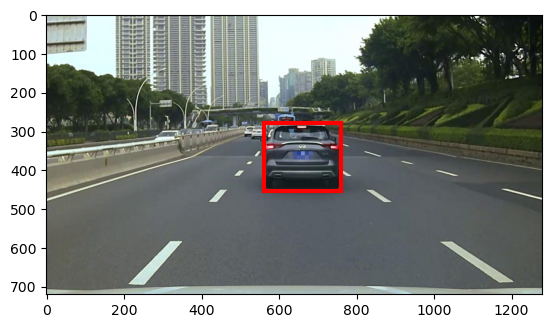

In [77]:
# import matplotlib.pyplot as plt
# from PIL import Image


# box = {'xmin': 560.9,
#     'ymin': 278.1,
#     'xmax': 761.1,
#     'ymax': 452.0}
# c1 = (int(box['xmin']), int(box['ymin']))
# c2 = (int(box['xmax']), int(box['ymax']))
# path = './test/00005.jpg'

# plt.imshow(Image.open(path))
# ax = plt.gca()
# ax.add_patch(plt.Rectangle(c1, c2[0]-c1[0], c2[1]-c1[1], fill=False, edgecolor='red', linewidth=3))
# plt.show()